# Exercise: Emissions per capita - creating a custom bar chart (solution)

Now that you had a chance to try this out yourself, below is one approach to making each plot.

## I. Prepare your data

In [1]:
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("data/fossil-fuels-per-capita.csv")
df

,entity,fossil_fuels
0,Africa,3564.061
1,Algeria,15416.595
2,Argentina,18648.033
3,Asia,16382.810
4,Australia,53779.406
...,...,...
79,Upper-middle-income countries,24585.860
80,Uzbekistan,16082.265
81,Venezuela,18473.283
82,Vietnam,10616.693


In [2]:
# Filter the data

regions = ["World", "Africa", "Asia", "Europe", "North America", "South America"]

# Create a subset of the data that just contains the regions in the list above
in_regions = df.loc[df["entity"].isin(regions)]

# Create a subset of the data that excludes the regions in the list above (the countries)
other_regions = places = df.loc[~df["entity"].isin(regions)]

# Get the top 25 countries
energy = other_regions.sort_values(by=["fossil_fuels"], ascending=False).head(25)

# Combine the data on the top 25 countries with the regions with the regions in the list above
fossil_temp = pd.concat([in_regions, energy], ignore_index=True)
fossil = (
    fossil_temp.sort_values(by=["fossil_fuels"], ascending=True)
    .reset_index()
    .drop(columns=["index"])
)
fossil

,entity,fossil_fuels
0,Africa,3564.061
1,South America,10600.557
2,Asia,16382.810
3,World,17430.111
4,Europe,28404.564
5,Czechia,29895.691
6,Israel,31346.912
7,Japan,32709.630
8,Hong Kong,33182.870
9,Oceania,34227.150



## II. Make a simple plot of your data (Level 1)


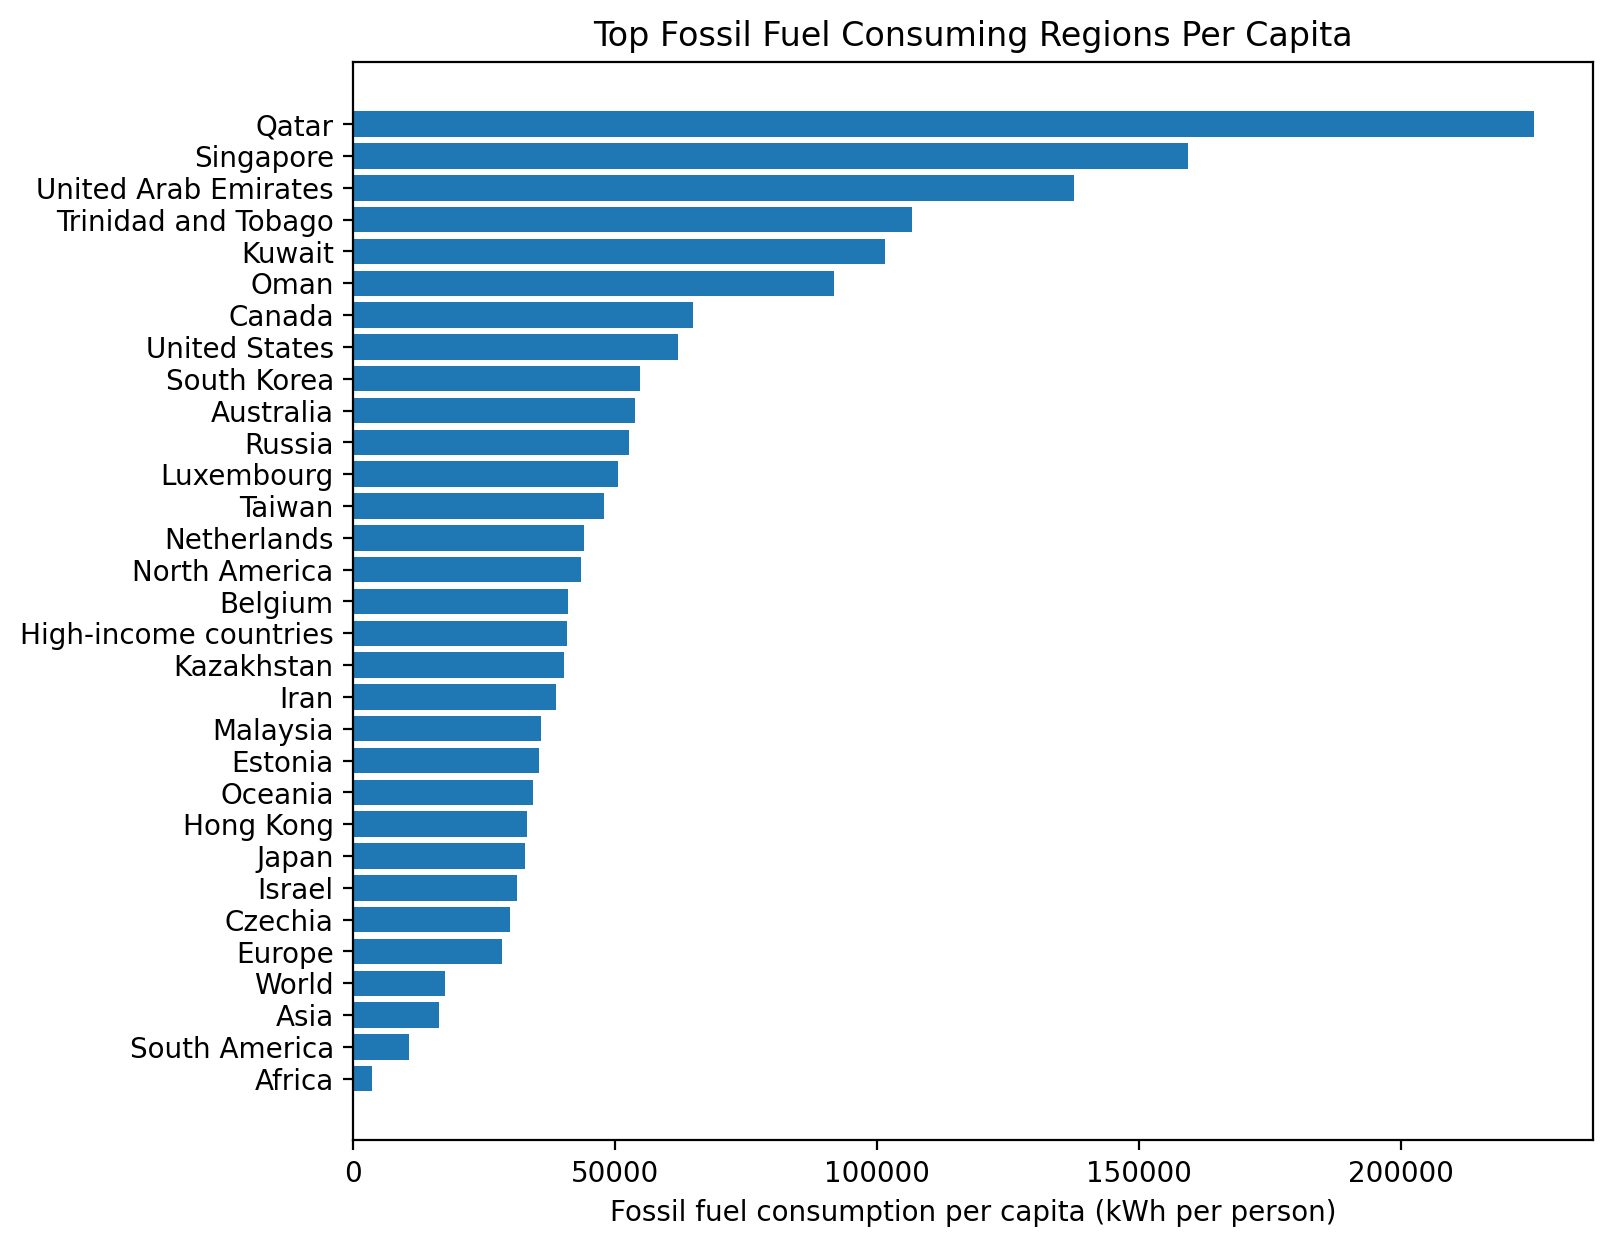

In [3]:
fig, ax = plt.subplots(figsize=(8, 7))
bars = ax.barh(fossil["entity"], fossil["fossil_fuels"])
ax.set_xlabel("Fossil fuel consumption per capita (kWh per person)")
ax.set_title("Top Fossil Fuel Consuming Regions Per Capita")

fig.savefig('img/worked_example_fossil_fuel_level_1.png', dpi=600, bbox_inches = 'tight')

## III. Make a professional-quality plot (Level 2 - OPTIONAL)

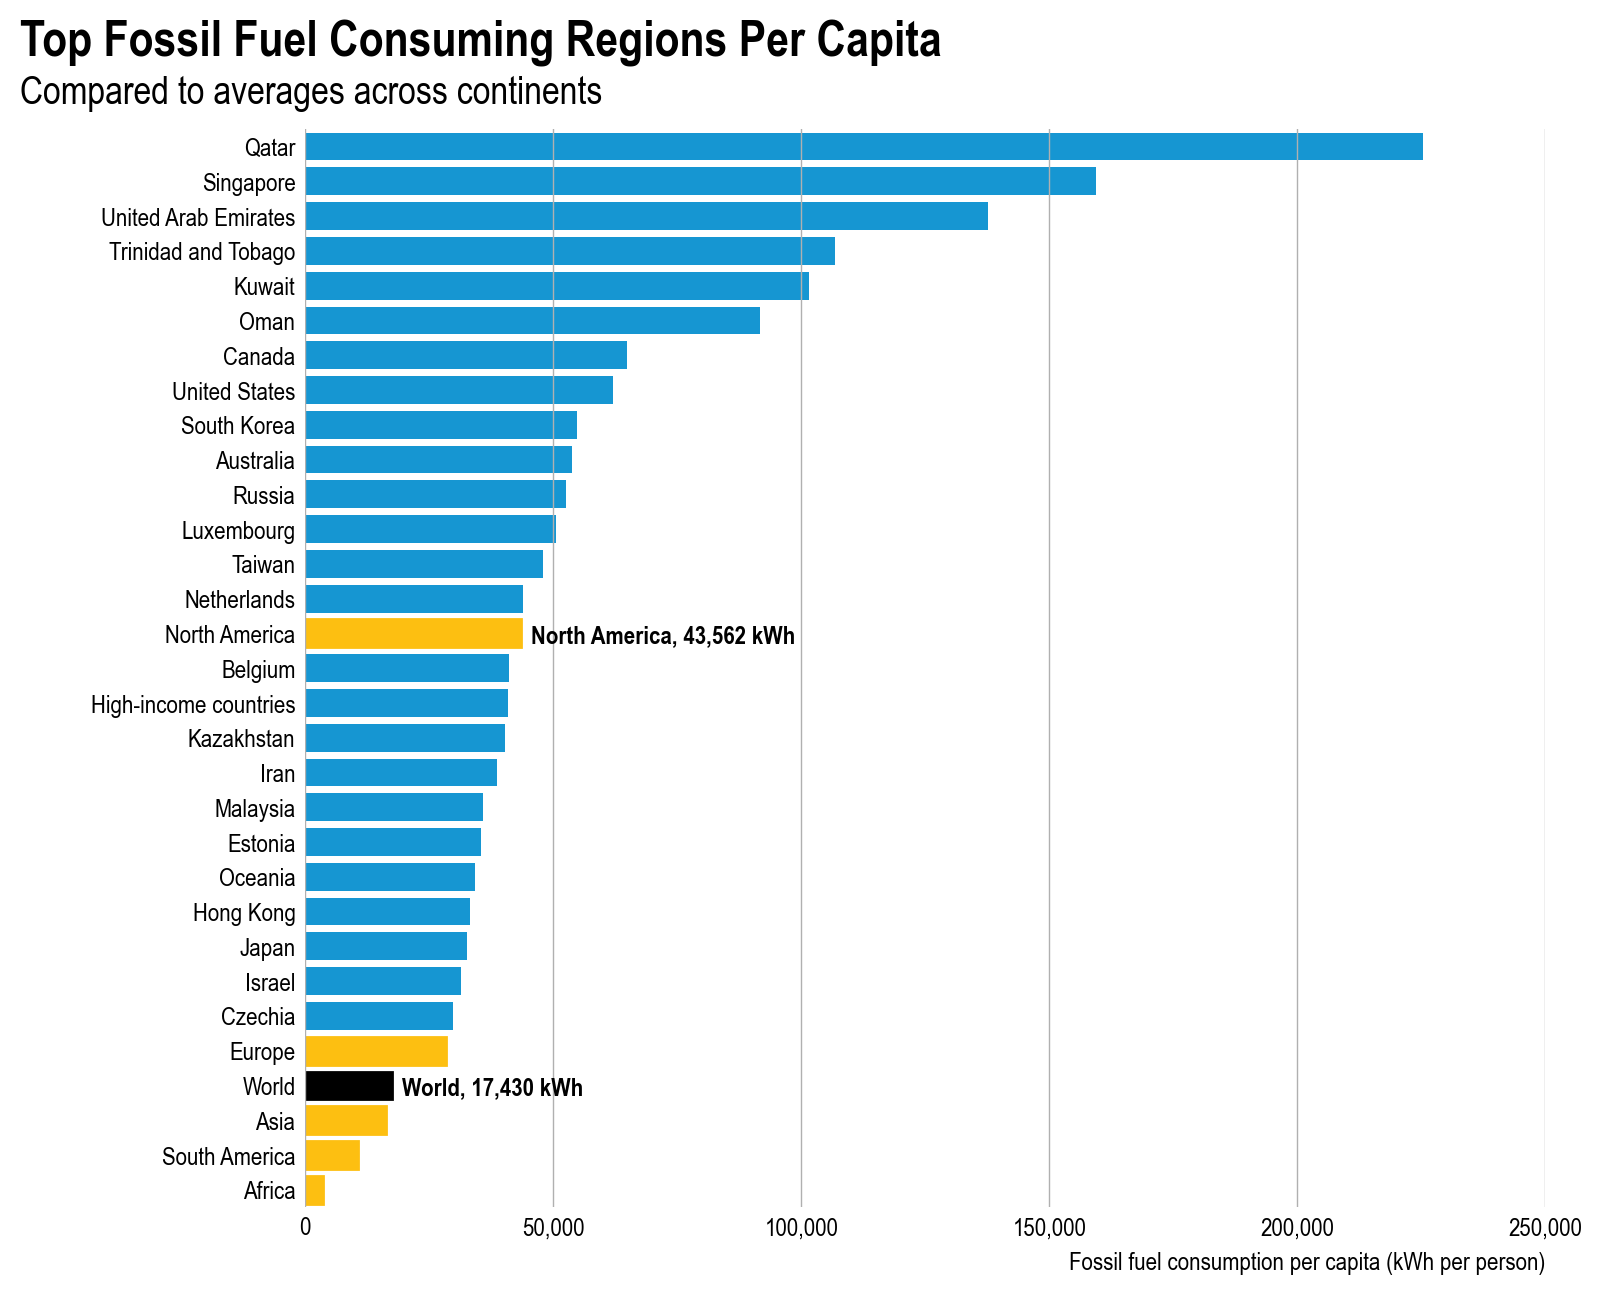

In [10]:
# Define our custom colors to use
blue = "#1696d2"
yellow = "#fdbf11"
black = "#000000"

# Define our list of continents (to color yellow)
continents = ["Africa", "Asia", "Europe", "North America", "South America"]
 
 # List of regions that we'll label the data to the side of the bar
places_to_label = ["World", "North America"]

# Set the font and size for the plot
plt.rcParams["font.size"] = 9
plt.rcParams["font.sans-serif"] = [
    "Arial Narrow",
    "DejaVu Sans",
    "Lucida Grande",
    "Verdana",
]

fig, ax = plt.subplots(figsize=(8, 7))

# Plot all regions as blue bars
bars = ax.barh(fossil["entity"], fossil["fossil_fuels"], color=blue, label="Region")

# Set the axis labels, limits, ticks, and tick labels
ax.set_xlabel("Fossil fuel consumption per capita (kWh per person)", loc="right")
ax.set_ylim([-0.5, len(fossil) - 0.5])
ax.set_xticks([0, 5e4, 10e4, 15e4, 20e4, 25e4])
ax.set_xticklabels(["0", "50,000", "100,000", "150,000", "200,000", "250,000"])

# Remove the lines for the ticks themselves
ax.tick_params(axis="both", length=0)

# Remove all the spines
ax.spines[:].set_visible(False)

# Make only the x-grid visible with a thinner line
ax.grid(visible=True, axis="x", linewidth="0.5")

#-----------------------------------------------------------
# Color select bars yellow and black
#-----------------------------------------------------------

# Function to change the bar color for a single bar
def set_bar_color(df, region, bars, color):
    bar_index = df.loc[df["entity"] == region].index[0]
    bars[bar_index].set_color(color)

# Function that sets the bar color for a list of regions 
def set_regions_color(df, region_list, bars, color):
    for place in region_list:
        set_bar_color(df, place, bars, color)

# Set the continents to one color
continent_color = yellow

# Color the continent bars yellow
set_regions_color(fossil, continents, bars, continent_color)

# Color the world bar black
set_bar_color(fossil, "World", bars, black)

#-----------------------------------------------------------
# Add custom titles
#-----------------------------------------------------------

# Title
ax.text(
    -0.23,
    1.08,
    "Top Fossil Fuel Consuming Regions Per Capita",
    horizontalalignment="left",
    verticalalignment="center",
    transform=ax.transAxes,
    fontweight="bold",
    fontsize=18,
)
# Subtitle
ax.text(
    -0.23,
    1.05,
    "Compared to averages across continents",
    horizontalalignment="left",
    verticalalignment="top",
    transform=ax.transAxes,
    fontsize=14,
)

#-----------------------------------------------------------
# Add custom titles
#-----------------------------------------------------------

def label_place(ax, df, place):
    cplace = df.loc[df["entity"] == place]["fossil_fuels"]
    fuel = cplace.values[0]
    string = f"{place}, {fuel:,.0f} kWh"
    ax.text(
        fuel + 2000,
        cplace.index[0] + 0.25,
        string,
        horizontalalignment="left",
        verticalalignment="top",
        fontweight="bold",
    )

for place in places_to_label:
    label_place(ax, fossil, place)

# Save the figure to file
fig.savefig('img/worked_example_fossil_fuel_level_2.png', dpi=600, bbox_inches = 'tight')

There is a lot of customization that went into this professional-grade plot, but even if your figure didn't quite look like this, every step in understanding how to customize matplotlib opens doors to what's possible for you to create with these tools. The more you use it, the greater your fluency with how these techniques work.